In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

In [2]:
import sncosmo

In [3]:
import analyzeSN as ans

## Load the SN from an SNANA simulation

This should work with all the supernovae in the simulation, but to make this example quick, let us just load the first one and represent the collection of SN.

In [6]:
# location is relative or absolute path to the file
sne = ans.snanaSims.SnanaSims.fromSNANAfileroot('snana_fits', location=ans.example_data, n=1)

/Users/rbiswas/.local/lib/python2.7/site-packages/analyzeSN/example_data/snana_fits_HEAD.FITS


Pick out the very first SN and reformat it to look the way sncosmo  expects SN to look

In [7]:
sn = ans.snanaSims.SnanaSims.reformat_SNANASN(sne.snList[0])

Make sure SNCosmo can understand band names

In [8]:
ans.snanaSims.SnanaSims.matchSNANAbandnamesinregistry()

We can look at the information in the light curve, or at the metadata

In [9]:
sn[:5]

MJD,band,FIELD,TELESCOPE,PHOTFLAG,PHOTPROB,flux,fluxerr,MAG,MAGERR,PSF_SIG1,PSF_SIG2,PSF_RATIO,SKY_SIG,SKY_SIG_T,RDNOISE,ZEROPT,ZEROPT_ERR,GAIN,ZP,ZPSYS
float64,str2,str12,str20,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,str2
52881.5,i,NULL,ALL,0,0.0,13.44,2.846,24.679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.5,ab
52881.539,r,NULL,ALL,0,0.0,7.74,1.701,25.278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.5,ab
52881.559,z,NULL,ALL,0,0.0,19.72,6.539,24.263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.5,ab
52886.602,i,NULL,ALL,0,0.0,44.52,2.909,23.379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.5,ab
52900.531,i,NULL,ALL,0,0.0,86.57,2.914,22.657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.5,ab


In [10]:
sn.meta

OrderedDict([('SNID', '03D1aw'),
             ('IAUC', 'UNKNOWN '),
             ('FAKE', 0),
             ('RA', 36.061607000000002),
             ('DECL', -4.5171140000000003),
             ('PIXSIZE', -9.0),
             ('NXPIX', 0),
             ('NYPIX', -9),
             ('SNTYPE', 0),
             ('NOBS', 48),
             ('PTROBS_MIN', 1),
             ('PTROBS_MAX', 48),
             ('MWEBV', 0.025),
             ('MWEBV_ERR', 0.0040000002),
             ('REDSHIFT_HELIO', -9.0),
             ('REDSHIFT_HELIO_ERR', 0.0),
             ('REDSHIFT_FINAL', 0.58170003),
             ('REDSHIFT_FINAL_ERR', 0.001),
             ('HOSTGAL_OBJID', 0),
             ('HOSTGAL_PHOTOZ', -9.0),
             ('HOSTGAL_PHOTOZ_ERR', -9.0),
             ('HOSTGAL_SPECZ', -9.0),
             ('HOSTGAL_SPECZ_ERR', -9.0),
             ('HOSTGAL_SNSEP', -9.0),
             ('HOSTGAL_LOGMASS', -9.0),
             ('HOSTGAL_LOGMASS_ERR', -9.0),
             ('HOSTGAL_MAG_g', 0.0),
             ('

## Fitting SN to models

Instantiate a model and fit Supernovae to it. Since this is a very short demonstration for how to use the SNANA simulations
rather than how to use SNCosmo correctly, we will stick to basics. A few points to note that are being ignored, even though I remember them (there are probably others that I cannot remember right away :) :

- Photometric redshifts are hard even when we have the model
- 'salt2' can have problems with high redshift supernovae, so using salt2-extended 
- MW extinction MUST be added to the model, but I am ignoring for now
- Model covariance should also be added for accurate results

In [11]:
model  = sncosmo.Model(source='salt2-extended')

In [12]:
model.set(z=sn.meta['REDSHIFT_FINAL'])
fit_results, fit_model = sncosmo.fit_lc(sn, model, vparam_names=['t0', 'x0', 'x1', 'c'])

In [13]:
print fit_model

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 1.0
  phases     : [-20, .., 50] days
  wavelengths: [300, .., 18000] Angstroms
parameters:
  z  = 0.58170002698898315
  t0 = 52902.658535727656
  x0 = 7.915816561859314e-06
  x1 = 0.51106105554992354
  c  = 0.26957985320119349


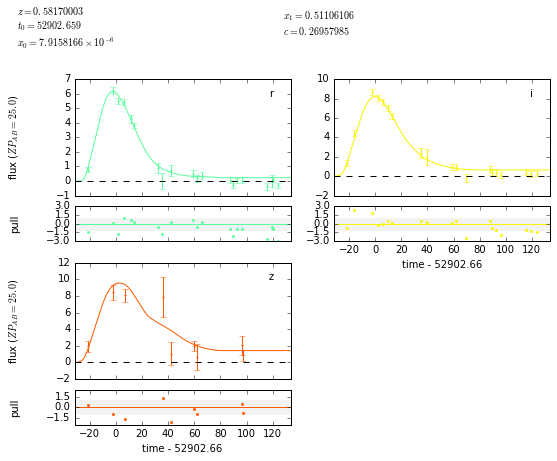

In [14]:
fig = sncosmo.plot_lc(sn, model=fit_model, band=['u', 'g', 'r', 'i', 'z', 'Y'], zp=25., zpsys='ab')

In [16]:
sncosmo.chisq(sn, fit_model)/ fit_results.ndof

0.88437760022231149